## Coupling panoids to road sections
To make a prediction for a certain road section, we must first determine which images relate to that section. For that reason we will create a coupling file which links each panoid to its closest road section

In [1]:
import os
import geopandas as gpd
import pandas as pd
import numpy as np
from retriever_functions import get_coupled_panoid_images

#### ATTENTION: Please enter path to the dataset as configured on your machine below:

In [2]:
folder_path = "Z:\data"

### Open Relevant Files

In [3]:
network_gdf = gpd.read_file(rf"{folder_path}\Delft_NL\network\edges\edges.geojson")
panoids_gdf = gpd.read_file(rf"{folder_path}\Delft_NL\panoids\panoids.geojson")

In [4]:
print(f"Amount of road sections: {len(network_gdf):_}")
print(f"Amount of picture locations: {len(panoids_gdf):_}")

Amount of road sections: 16_237
Amount of picture locations: 35_856


### Couple panoids to road sections
We couple the panoid to a road section by simply looking at which road section is closest to that panoid, and adding the panoid index to the couple-list of that road section. We save this coupling list as a seperate .csv as to preserve the network and panoid datasets and allow for easy cross-referncing later on

In [5]:
## WARNING: This codecell creates the coupling.csv and takes around 17 minutes to run
## Uncomment this code if you want to create the couplign.csv again

# coupling = pd.DataFrame(data={'coupled_panoids': [None] * len(network_gdf)},
#                         index = network_gdf.index.values.tolist() )
# count = 0
# for panoid_index, panoid_data in panoids_gdf.iterrows():
#     distances = network_gdf.distance(panoid_data['geometry'])
#     closest_road = distances.idxmin()
#     if coupling.loc[closest_road, 'coupled_panoids'] is None:
#         coupling.loc[closest_road, 'coupled_panoids'] = [panoid_index]
#     else:
#         coupling.loc[closest_road, 'coupled_panoids'].append(panoid_index)
#     count += 1
#     if count % 1000 == 0:
#         print(count)

# coupling.to_csv(os.path.join(os.pardir, "Data\coupling.csv"))

In [6]:
# Regardless if block above was run, open last made coupling.csv (leave uncommented)
coupling = pd.read_csv(os.path.join(os.pardir, "Data\coupling.csv"), index_col=0)
coupling

,coupled_panoids
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
16232,"[35841, 35842, 35843, 35849]"
16233,NaN
16234,NaN
16235,"[35822, 35823, 35824, 35825, 35826, 35827, 358..."


When looking at the coupling results, it seems that a large amount of road section do not have an associated image:

In [7]:
none_count = 0
for _, coupled in coupling.iterrows():
    if coupled['coupled_panoids'] is np.NaN:
        none_count += 1

print(f"Out of {len(coupling):_} sections, {none_count:_} ({none_count*100/len(coupling):.3}%) have no associated panoids")

Out of 16_237 sections, 11_801 (72.7%) have no associated panoids


### Retrieve associated panoid images
Now that we have coupled the images and the road sections, we can retrieve the images specific to a single road section. This process has been put into a function in seperate .py file

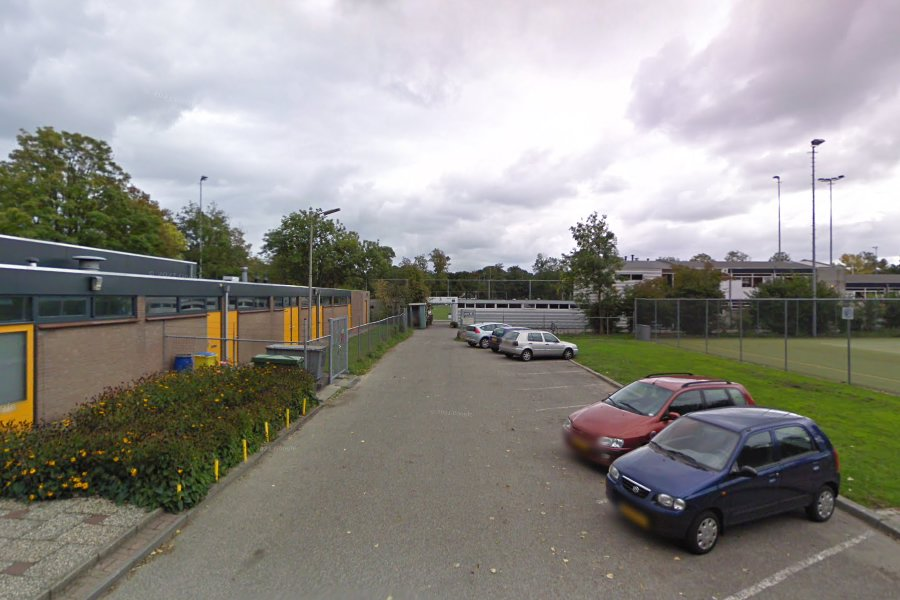

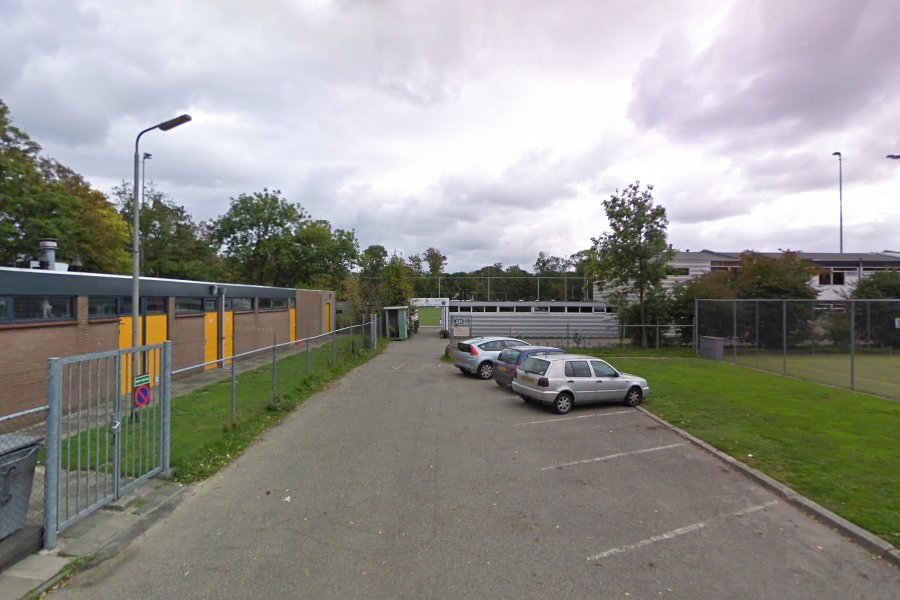

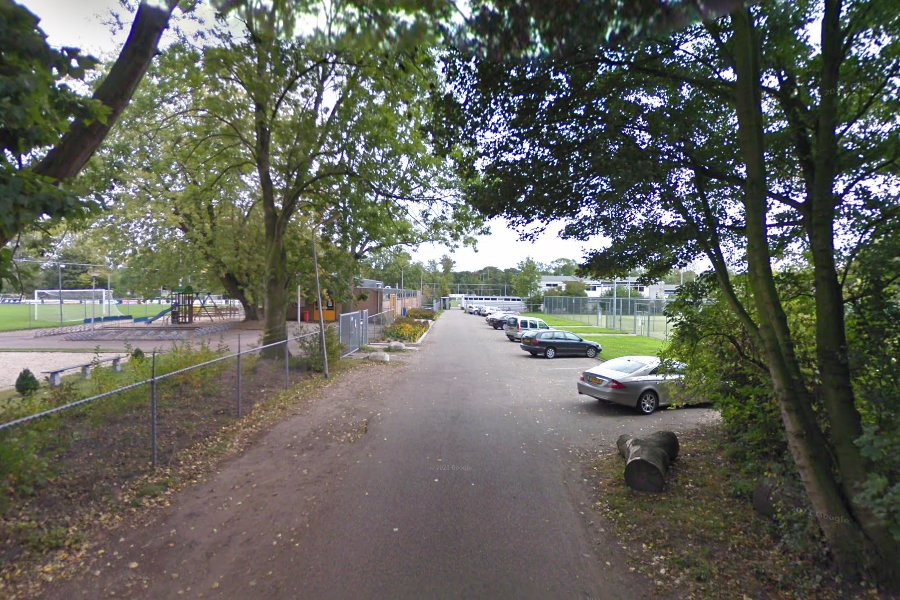

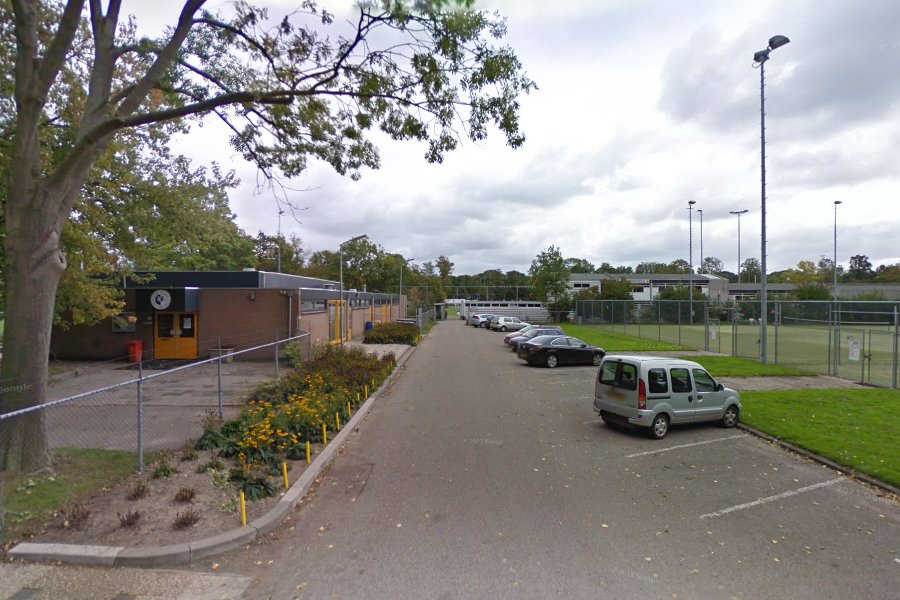

{35841: {'side_a': 'Z:\\data\\Delft_NL\\imagedb\\image_35841_s_a.png', 'front': 'Z:\\data\\Delft_NL\\imagedb\\image_35841_f.png', 'side_b': 'Z:\\data\\Delft_NL\\imagedb\\image_35841_s_b.png', 'back': 'Z:\\data\\Delft_NL\\imagedb\\image_35841_b.png'}, 35842: {'side_a': 'Z:\\data\\Delft_NL\\imagedb\\image_35842_s_a.png', 'front': 'Z:\\data\\Delft_NL\\imagedb\\image_35842_f.png', 'side_b': 'Z:\\data\\Delft_NL\\imagedb\\image_35842_s_b.png', 'back': 'Z:\\data\\Delft_NL\\imagedb\\image_35842_b.png'}, 35843: {'side_a': 'Z:\\data\\Delft_NL\\imagedb\\image_35843_s_a.png', 'front': 'Z:\\data\\Delft_NL\\imagedb\\image_35843_f.png', 'side_b': 'Z:\\data\\Delft_NL\\imagedb\\image_35843_s_b.png', 'back': 'Z:\\data\\Delft_NL\\imagedb\\image_35843_b.png'}, 35849: {'side_a': 'Z:\\data\\Delft_NL\\imagedb\\image_35849_s_a.png', 'front': 'Z:\\data\\Delft_NL\\imagedb\\image_35849_f.png', 'side_b': 'Z:\\data\\Delft_NL\\imagedb\\image_35849_s_b.png', 'back': 'Z:\\data\\Delft_NL\\imagedb\\image_35849_b.png'}}

In [12]:
example = get_coupled_panoid_images(16232, panoids_gdf, coupling, folder_path, display_front=True)
print(example)